In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [57]:
data = pd.read_csv('final_database.csv')

In [58]:
data

,Unnamed: 0,State,City,Pop,PCI,price,rating,review,Total
0,0,ak,bristol bay borough,877,"116,340",1.500000,3.750000,6.500000,6.0
1,1,ak,sitka city and borough,8647,"66,157",1.933333,3.966667,38.466667,26.0
2,2,ak,matanuska-susitna borough,107610,"45,608",1.894737,3.947368,68.421053,28.0
3,3,ak,kenai peninsula borough,58533,"50,466",2.111111,4.277778,64.166667,45.0
4,4,ak,juneau city and borough,32113,"62,774",1.911765,3.911765,110.058824,94.0
...,...,...,...,...,...,...,...,...,...
1208,1208,wv,mason,938,"28,756",1.083333,3.500000,5.833333,17.0
1209,1209,wv,logan,1511,"32,521",1.222222,4.333333,4.555556,13.0
1210,1210,wv,clay,448,"28,882",1.431818,3.343750,27.431818,635.0
1211,1211,wy,laramie,32473,"49,426",1.566667,3.583333,72.300000,81.0


In [60]:
data['PCI'] = data['PCI'].apply(lambda x: x.replace(',', ''))


In [61]:
data

,Unnamed: 0,State,City,Pop,PCI,price,rating,review,Total
0,0,ak,bristol bay borough,877,116340,1.500000,3.750000,6.500000,6.0
1,1,ak,sitka city and borough,8647,66157,1.933333,3.966667,38.466667,26.0
2,2,ak,matanuska-susitna borough,107610,45608,1.894737,3.947368,68.421053,28.0
3,3,ak,kenai peninsula borough,58533,50466,2.111111,4.277778,64.166667,45.0
4,4,ak,juneau city and borough,32113,62774,1.911765,3.911765,110.058824,94.0
...,...,...,...,...,...,...,...,...,...
1208,1208,wv,mason,938,28756,1.083333,3.500000,5.833333,17.0
1209,1209,wv,logan,1511,32521,1.222222,4.333333,4.555556,13.0
1210,1210,wv,clay,448,28882,1.431818,3.343750,27.431818,635.0
1211,1211,wy,laramie,32473,49426,1.566667,3.583333,72.300000,81.0


In [62]:
data['PCI'] = data['PCI'].astype('int')

In [64]:
data = data.drop('Unnamed: 0', axis=1)

In [65]:
data.dtypes

State      object
City       object
Pop         int64
PCI         int32
price     float64
rating    float64
review    float64
Total     float64
dtype: object

In [69]:
X = data[['price', 'rating', 'review', 'Total', 'Pop']]
y = data['PCI'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1213, 5) (1213, 1)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
# Fit the model to the training data and calculate the scores for the training and testing data


model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.17570458808639577
Testing Score: 0.10336014855898501


Text(0.5, 1.0, 'Residual Plot')

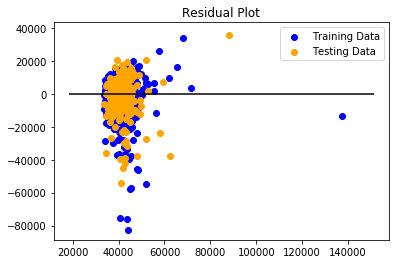

In [73]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [66]:
data.corr()

,Pop,PCI,price,rating,review,Total
Pop,1.000000,0.280336,0.155902,0.073694,0.564684,0.750052
PCI,0.280336,1.000000,0.292879,0.074158,0.325970,0.325711
price,0.155902,0.292879,1.000000,0.339272,0.399882,0.253620
rating,0.073694,0.074158,0.339272,1.000000,0.178674,0.110368
review,0.564684,0.325970,0.399882,0.178674,1.000000,0.700867
Total,0.750052,0.325711,0.253620,0.110368,0.700867,1.000000
